# Notebook overview
Visualizes the created datasets by plotting the number of classes and the number of examples per class for each split.

- Loads label maps and dataset CSVs (high and low)
- Merges species labels and computes per-class counts
- Generates and saves bar charts for: Training, Validation, Test FG, Test FG + DG, Test ND, Test ND + DG

This plot was used to create the final diagram in the paper, which was produced in Adobe Illustrator.

# Preperation

### Imports

In [200]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

### Path - df_source_dir

In [ ]:
DF_SOURCE_PATH = r'/home/stud/jleick/masterArbeitProjekt/data/datasets/created'
df_source_dir = Path(DF_SOURCE_PATH)

### Path - destination_dir

In [ ]:
DESTINATION_PATH = r'/home/stud/jleick/masterArbeitProjekt/data/datasets/created/visualisation'
destination_dir = Path(DESTINATION_PATH)

### Load df - id_label_map, ood_label_map

In [203]:
id_label_map = pd.read_csv(df_source_dir / 'label_map_id.csv', index_col=0)
ood_label_map = pd.read_csv(df_source_dir / 'label_map_ood.csv', index_col=0)

## high

### Load df - high_id_train, ... 

In [204]:
high_id_train = pd.read_csv(df_source_dir / 'high_id_train.csv', index_col=0, usecols=['speciesKey'])
high_id_val = pd.read_csv(df_source_dir / 'high_id_val.csv', index_col=0, usecols=['speciesKey'])

high_id_test = pd.read_csv(df_source_dir / 'high_id_test.csv', index_col=0, usecols=['speciesKey'])
high_ood_test = pd.read_csv(df_source_dir / 'high_ood_test.csv', index_col=0, usecols=['speciesKey'])

### Merge df label - high_id_train_label, ...

In [205]:
high_id_train_label = high_id_train.merge(id_label_map, how='left', on='speciesKey')
high_id_val_label = high_id_val.merge(id_label_map, how='left', on='speciesKey')

high_id_test_label = high_id_test.merge(id_label_map, how='left', on='speciesKey')
high_ood_test_label = high_ood_test.merge(ood_label_map, how='left', on='speciesKey')

### Calculate - train_high_id_species_count, ...

In [206]:
train_high_id_species_count = high_id_train_label['label'].value_counts().sort_index()
val_high_id_species_count = high_id_val_label['label'].value_counts().sort_index()

test_high_id_species_count = high_id_test_label['label'].value_counts().sort_index()
test_high_ood_species_count = high_ood_test_label['label'].value_counts().sort_index()

## low

### Load df - low

In [207]:
low_id_test = pd.read_csv(df_source_dir / 'low_id_test.csv', index_col=0, usecols=['speciesKey'])
low_ood_test = pd.read_csv(df_source_dir / 'low_ood_test.csv', index_col=0, usecols=['speciesKey'])

### Merge df label - low_id_test_label, low_ood_test_label

In [208]:
low_id_test_label = low_id_test.merge(id_label_map, how='left', on='speciesKey')
low_ood_test_label = low_ood_test.merge(ood_label_map, how='left', on='speciesKey')

### Calculate - low_id_test_species_count

In [209]:
test_low_id_species_count = low_id_test_label['label'].value_counts().sort_index()
test_low_ood_species_count = low_ood_test_label['label'].value_counts().sort_index()

# Function

### Function - plot_bar_chart

In [ ]:
def plot_bar_chart( series, file_name ):
    fig = plt.figure(figsize=(25,17)) #figsize ignored because each plot has its own figsize
    ax = fig.add_subplot(1,1,1)

    y_lim = 1050

    x_labels = series.index.astype(str)
    y_values = series.values
    x_positions = np.arange(len(series))

    ax.bar(x_positions, y_values, width=0.8)
    ax.tick_params(axis='x', rotation=90, labelsize=18)
    ax.tick_params(axis='y', labelsize=20)

    yticks = np.arange(0,y_lim,50)
    ax.set_yticks(yticks)
    ax.set_ylim(0, y_lim)

    ax.set_xlim( -1, 91 )

    # Y-Werte unter die x-Achse schreiben
    # for i, (x, y) in enumerate(zip(x_positions, y_values)):
    #    ax.text(x, y + 50 , str(y), ha='center', va='top', fontsize=18, rotation=90)

        
    ax.set_xticks(x_positions)

    ax.set_xticklabels(x_labels)

    #ax.set_xlabel('Label of species')
    #ax.set_ylabel('Nr. of Images')

    ax.set_axisbelow(True)
    plt.grid(True, axis='y')

    plt.tight_layout()

    fig.savefig(file_name)

    fig.show()

# plot_par_chart( train_high_species_count, '/home/jleick/masterArbeitProjekt/output/train_high_species_count.eps' )

# Apply

### Apply high - plot_bar_chart

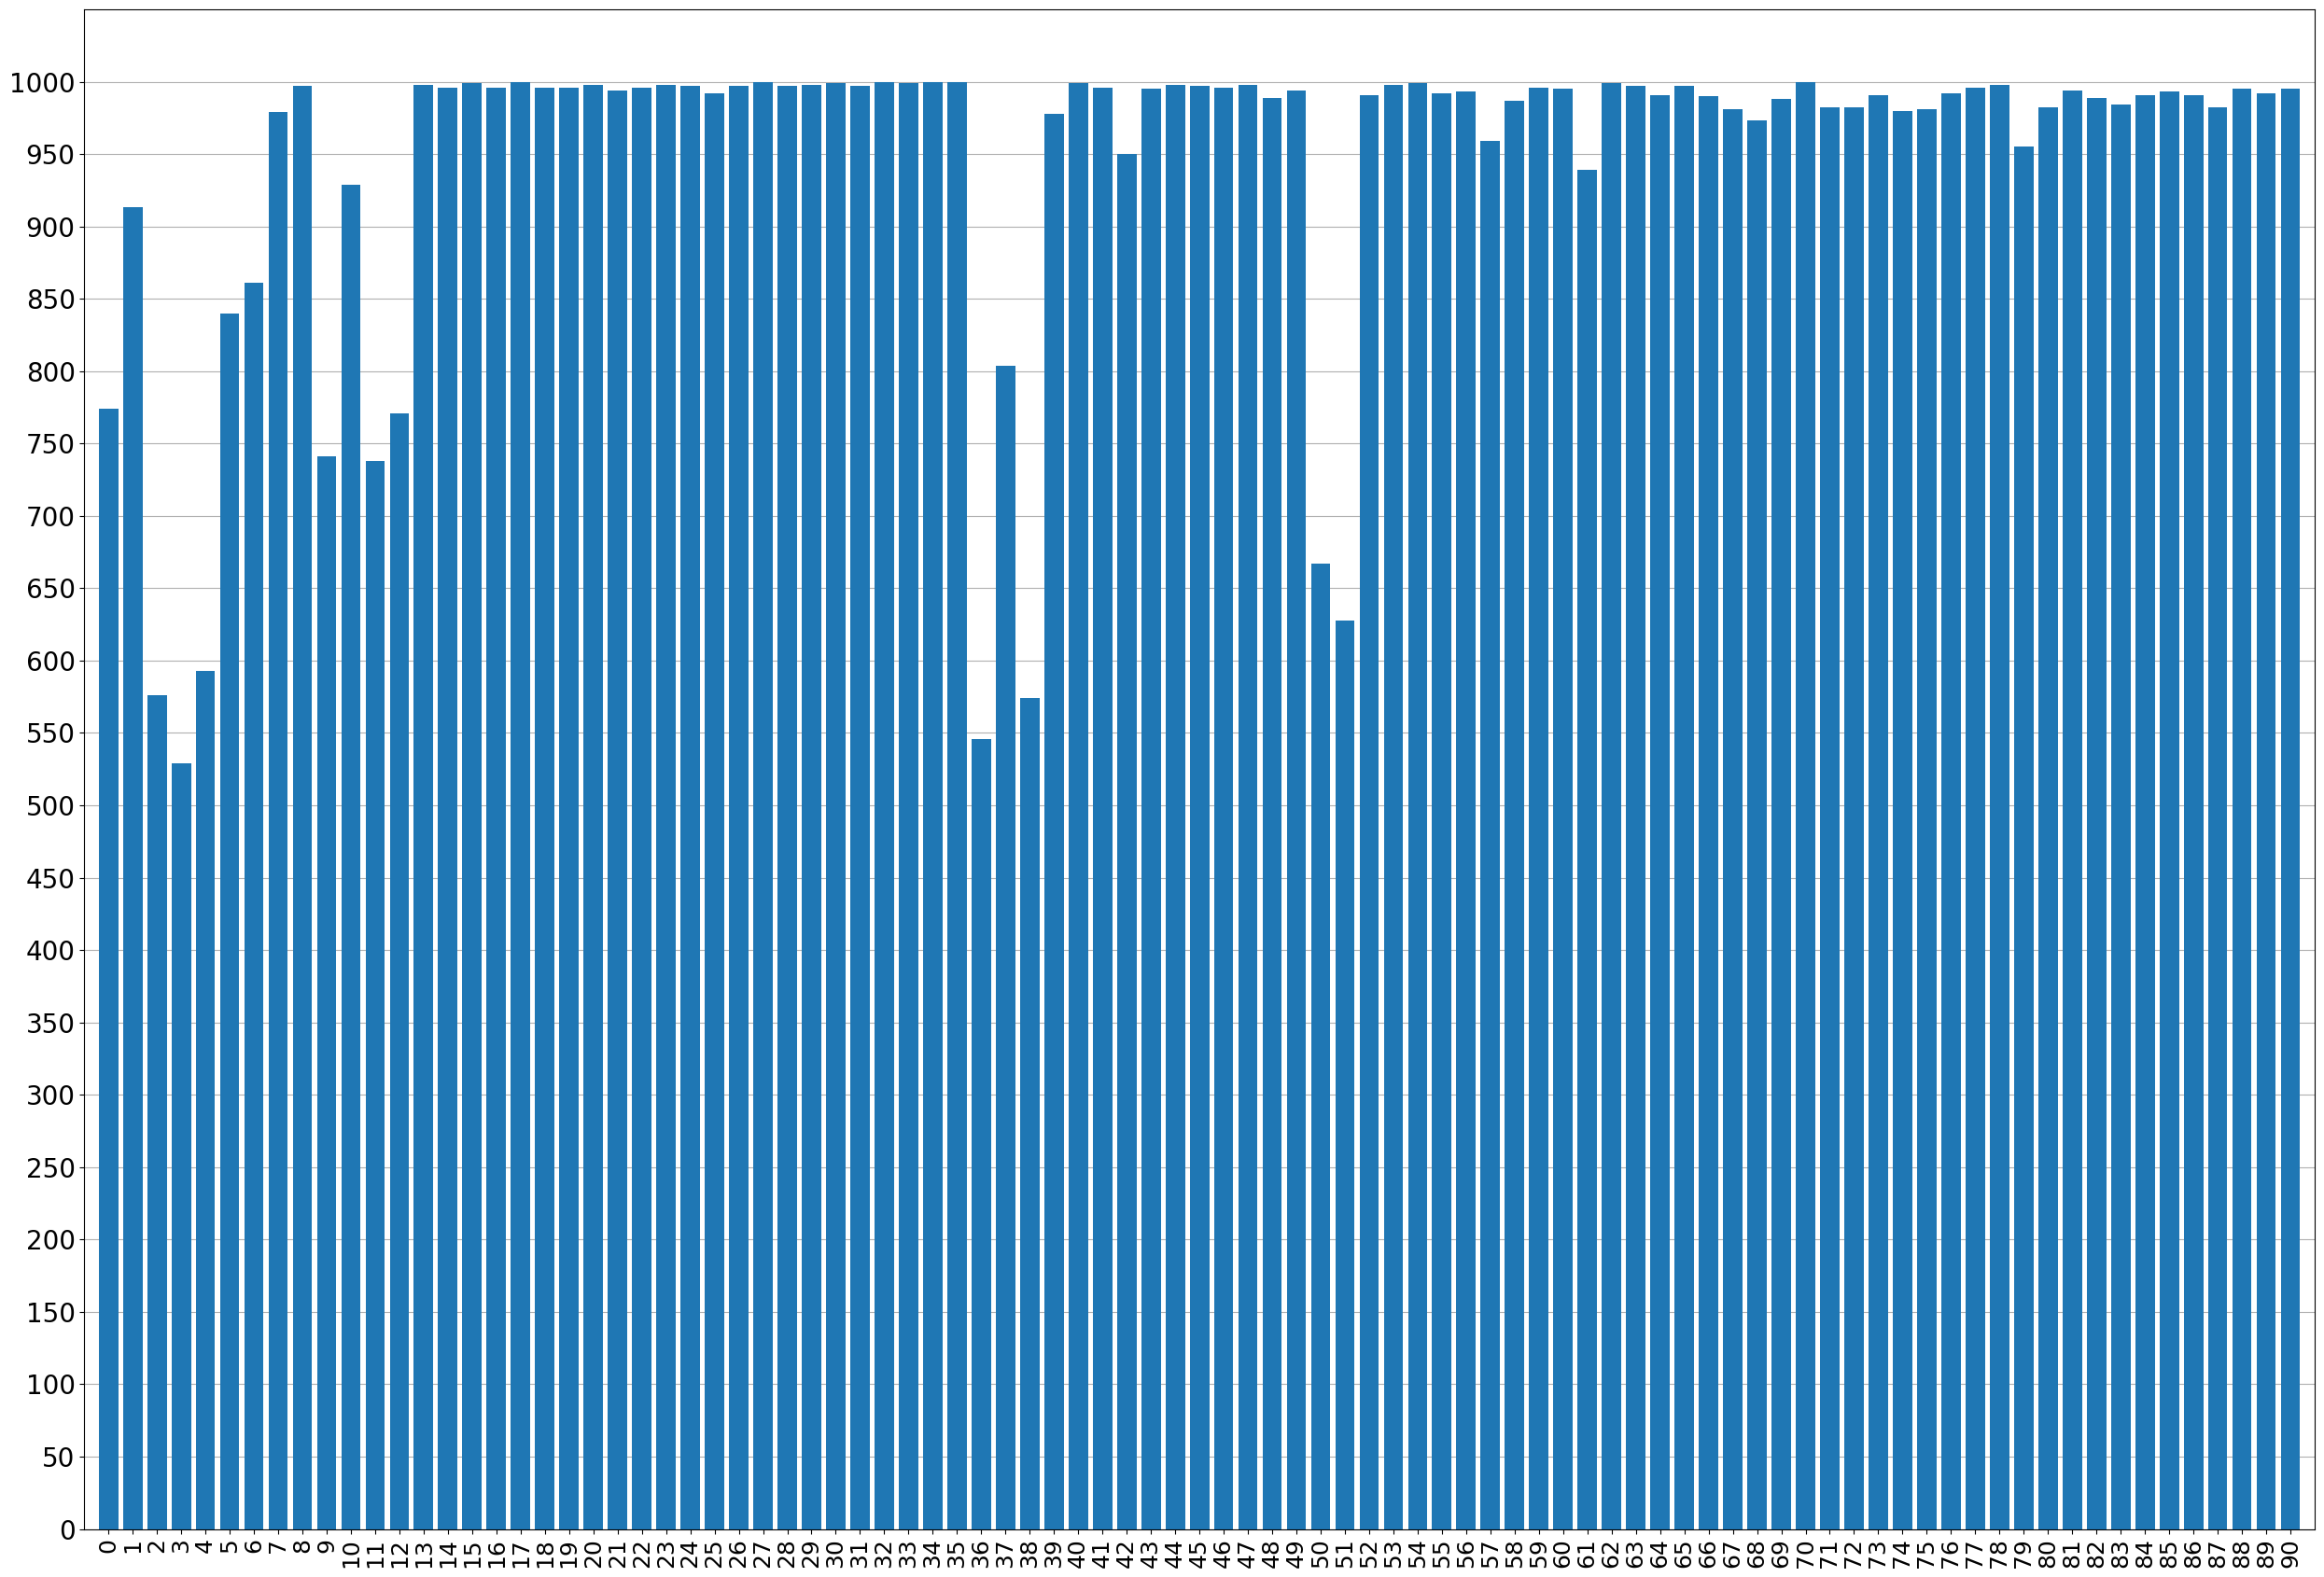

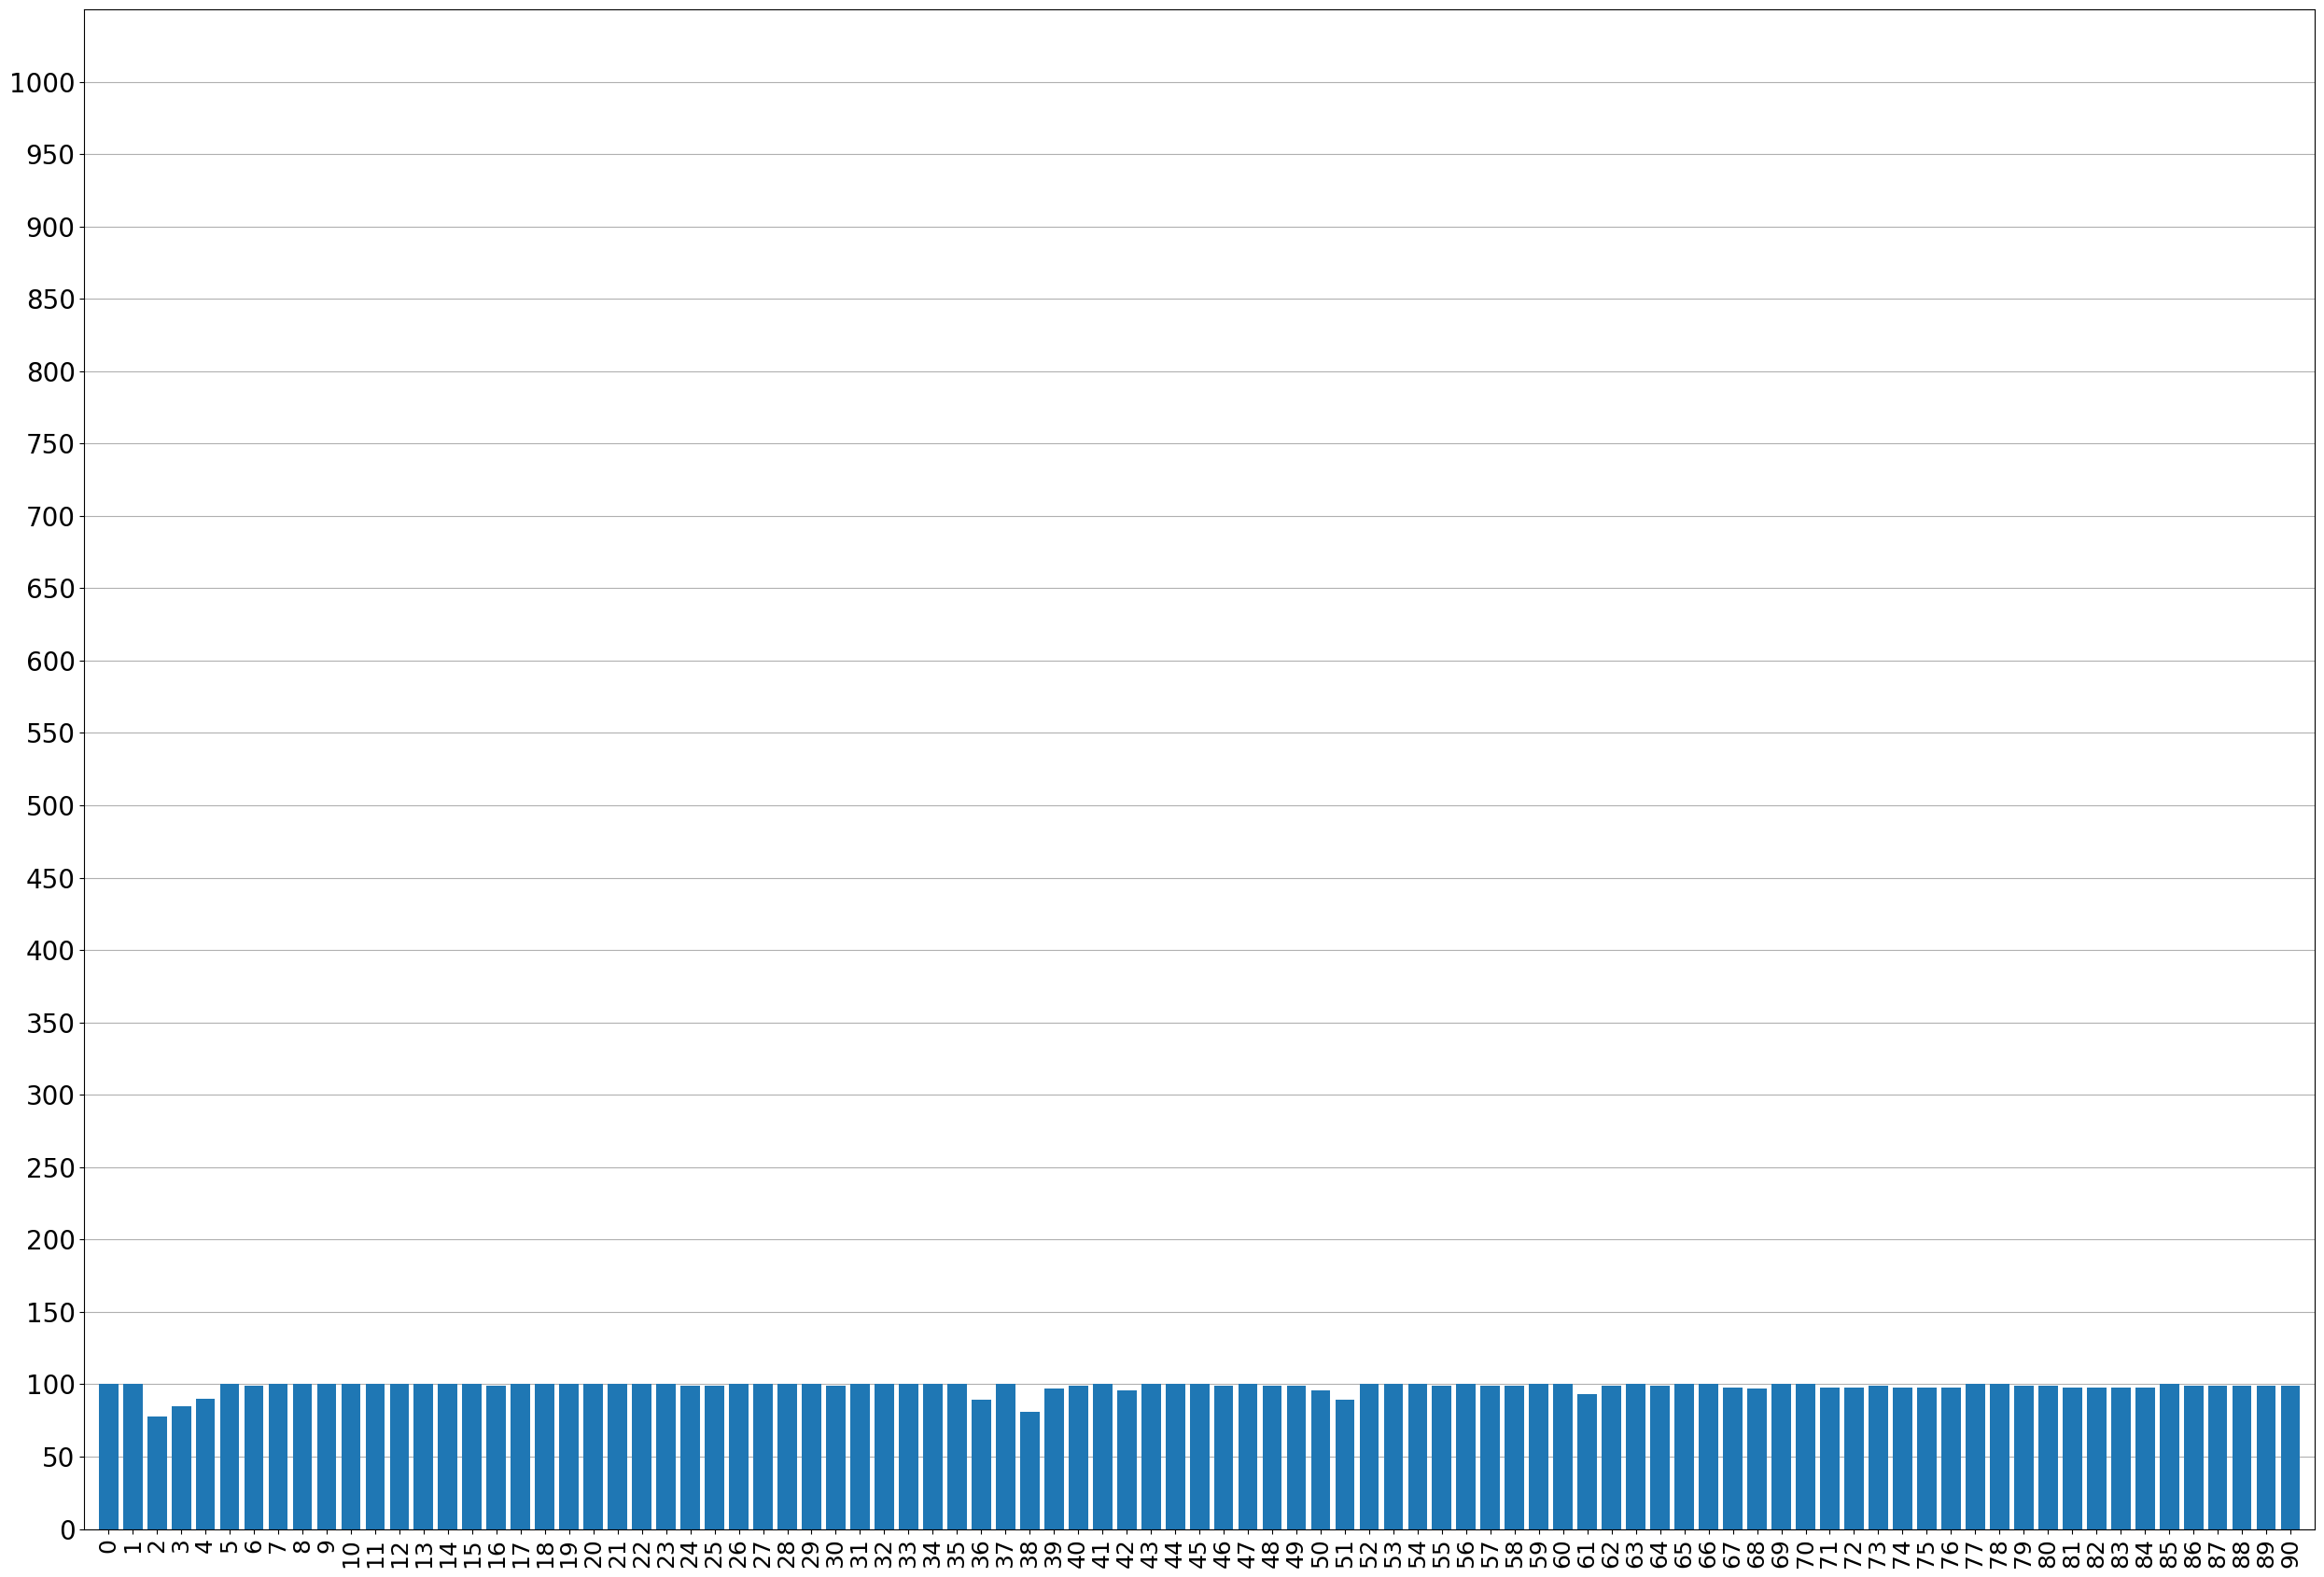

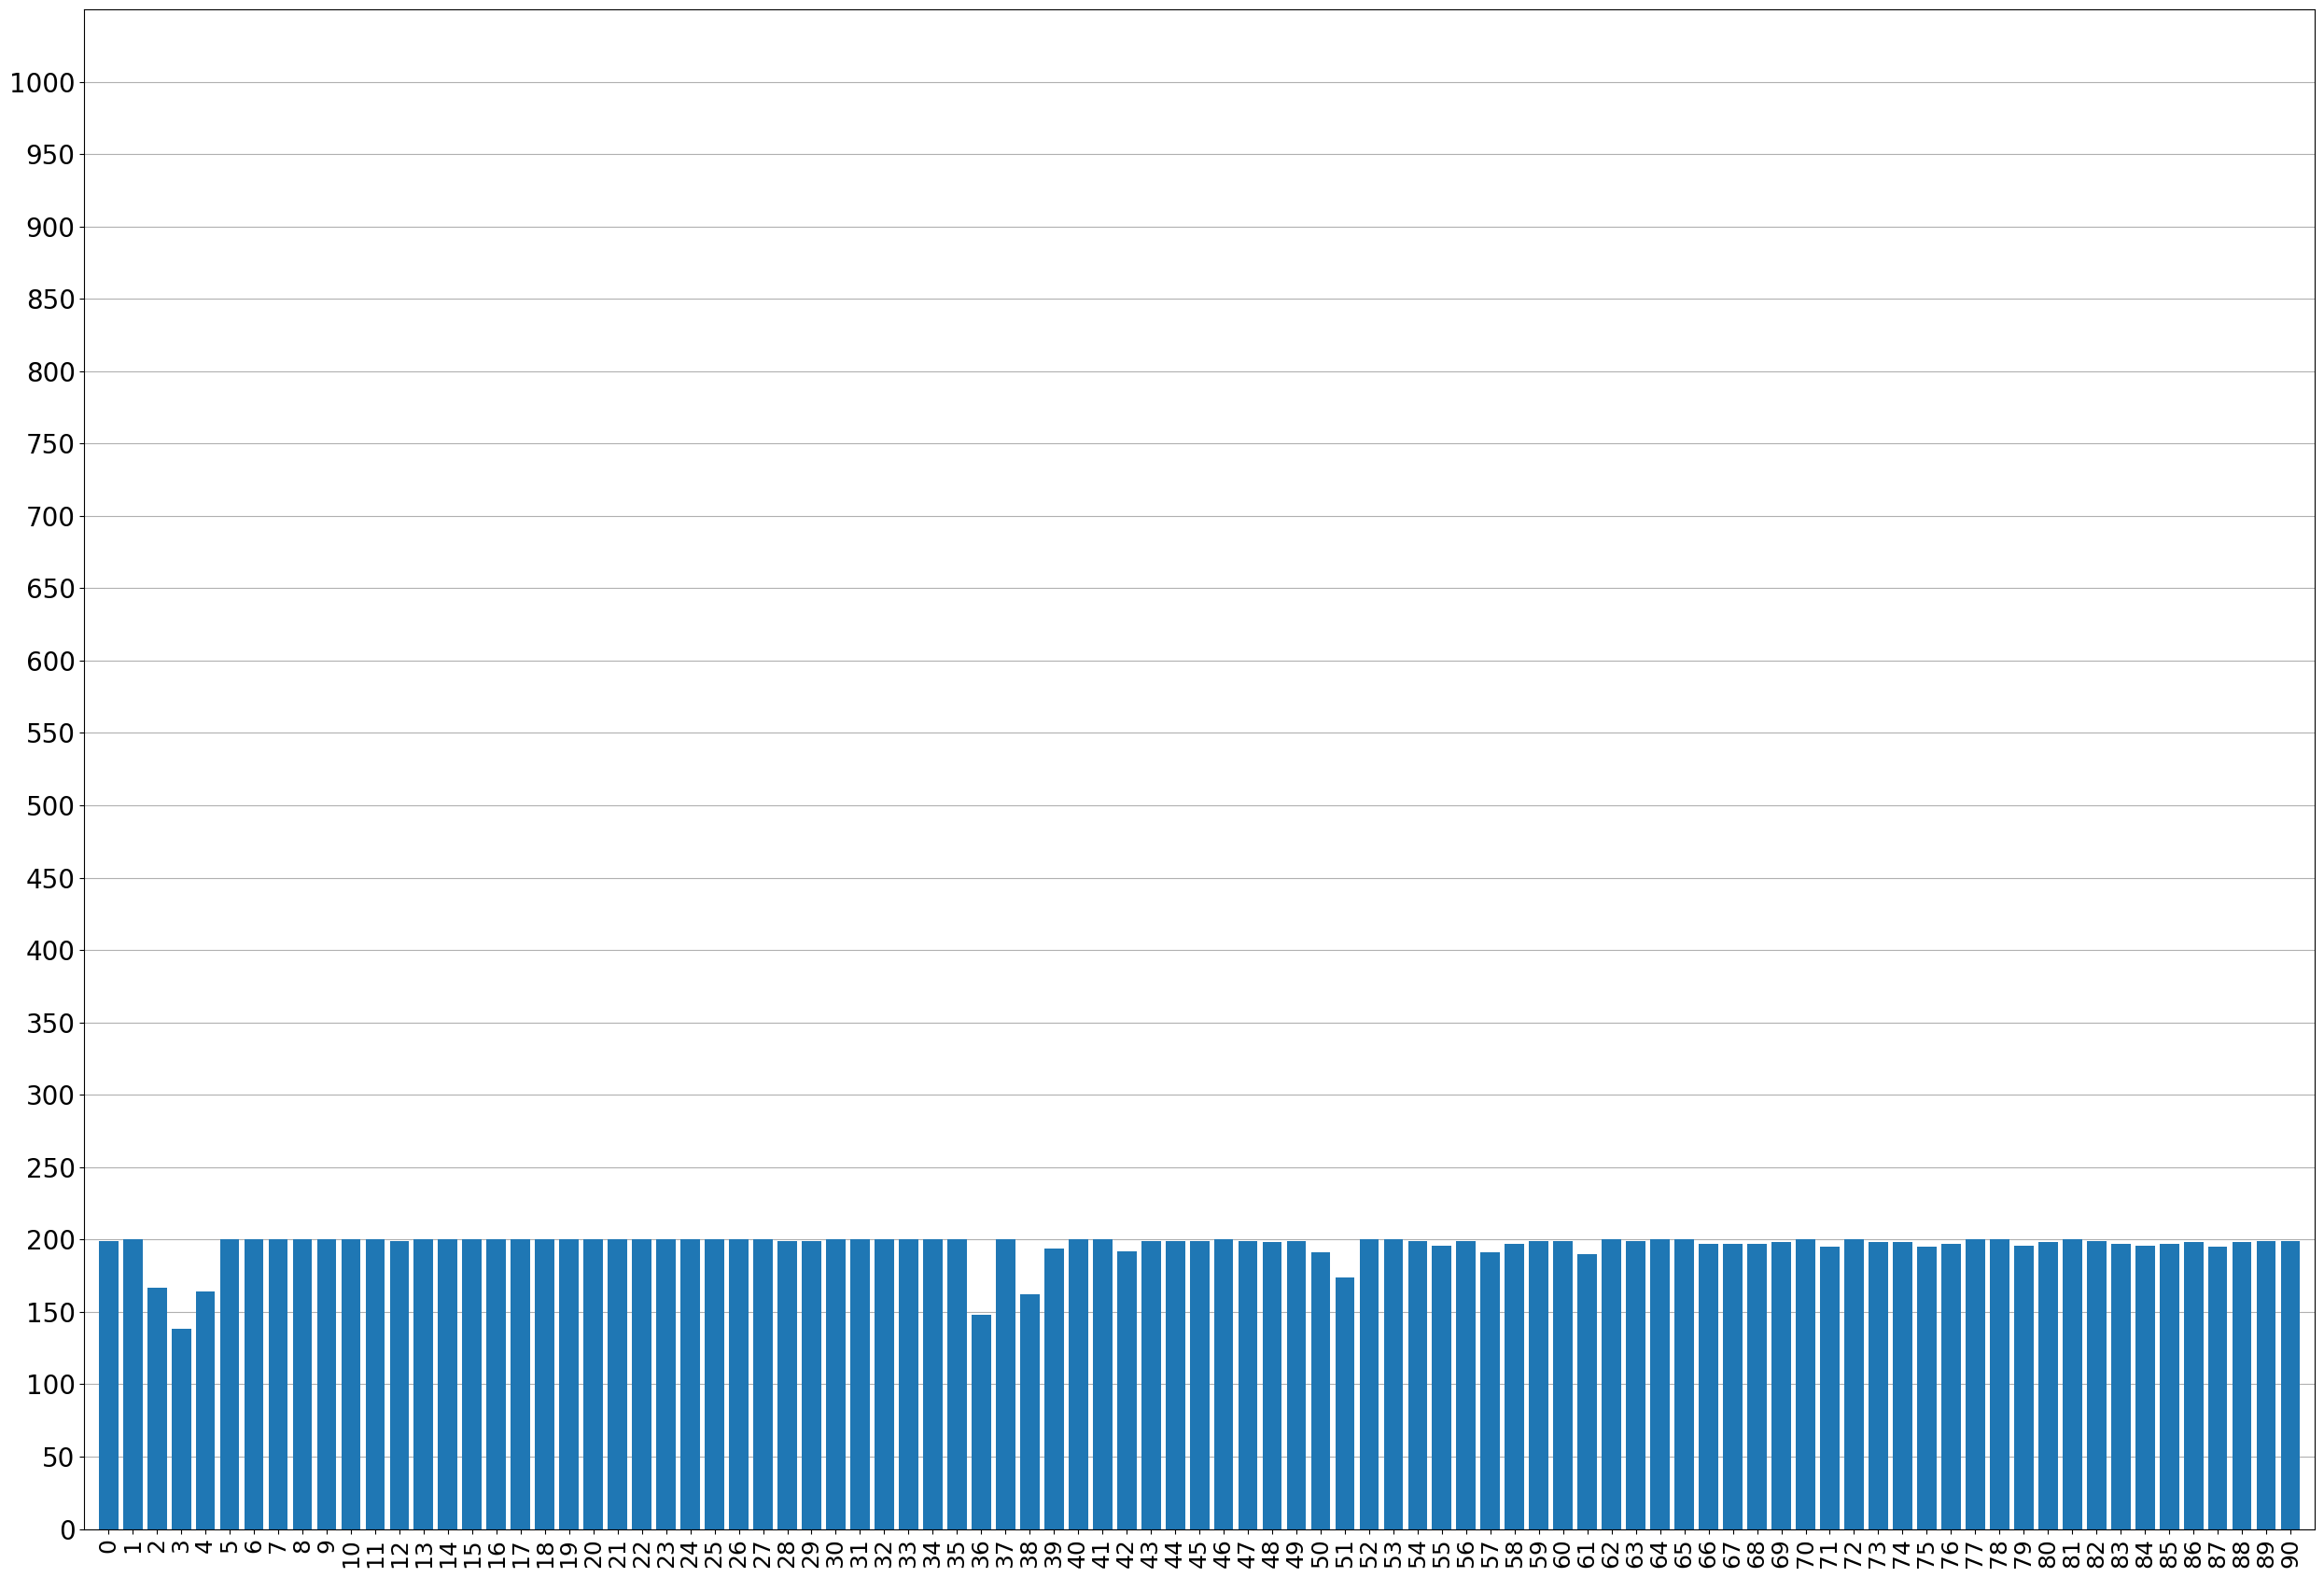

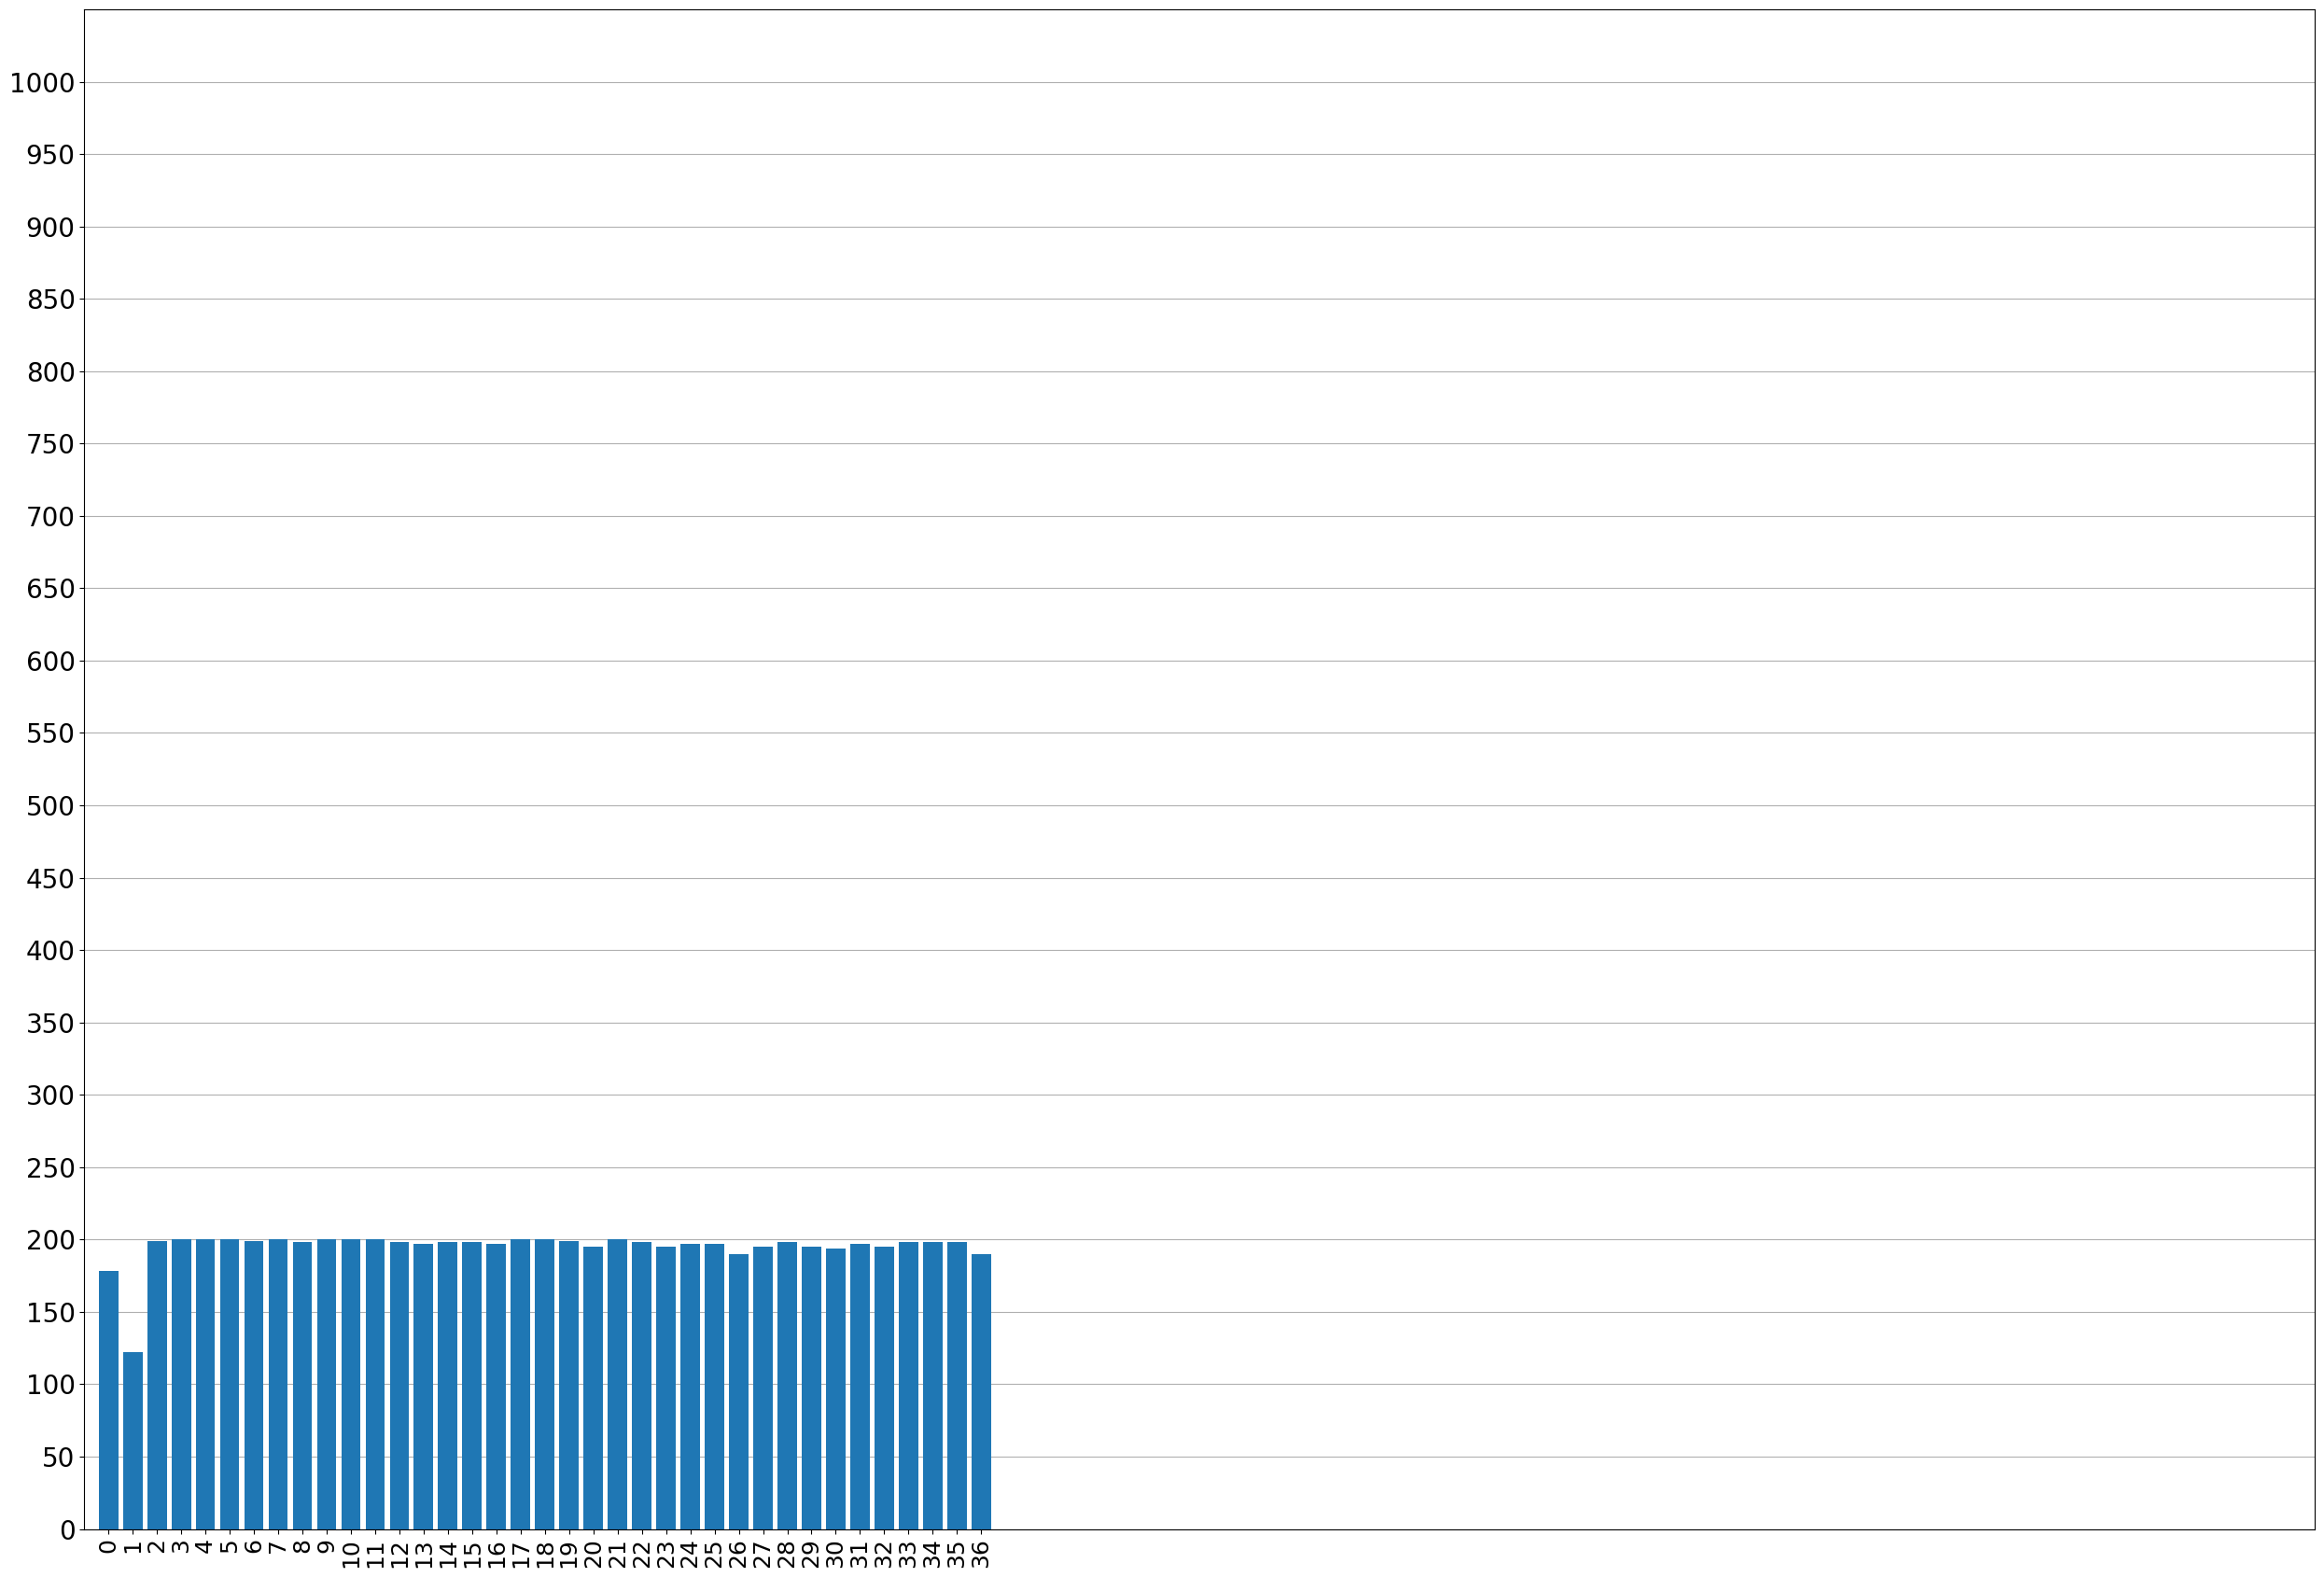

In [211]:
plot_bar_chart(train_high_id_species_count, destination_dir / 'high_id_train.pdf')
plot_bar_chart(val_high_id_species_count, destination_dir / 'high_id_val.pdf')

plot_bar_chart(test_high_id_species_count, destination_dir / 'high_id_test.pdf')
plot_bar_chart(test_high_ood_species_count , destination_dir / 'high_ood_test.pdf')

### Apply low - plot_bar_chart

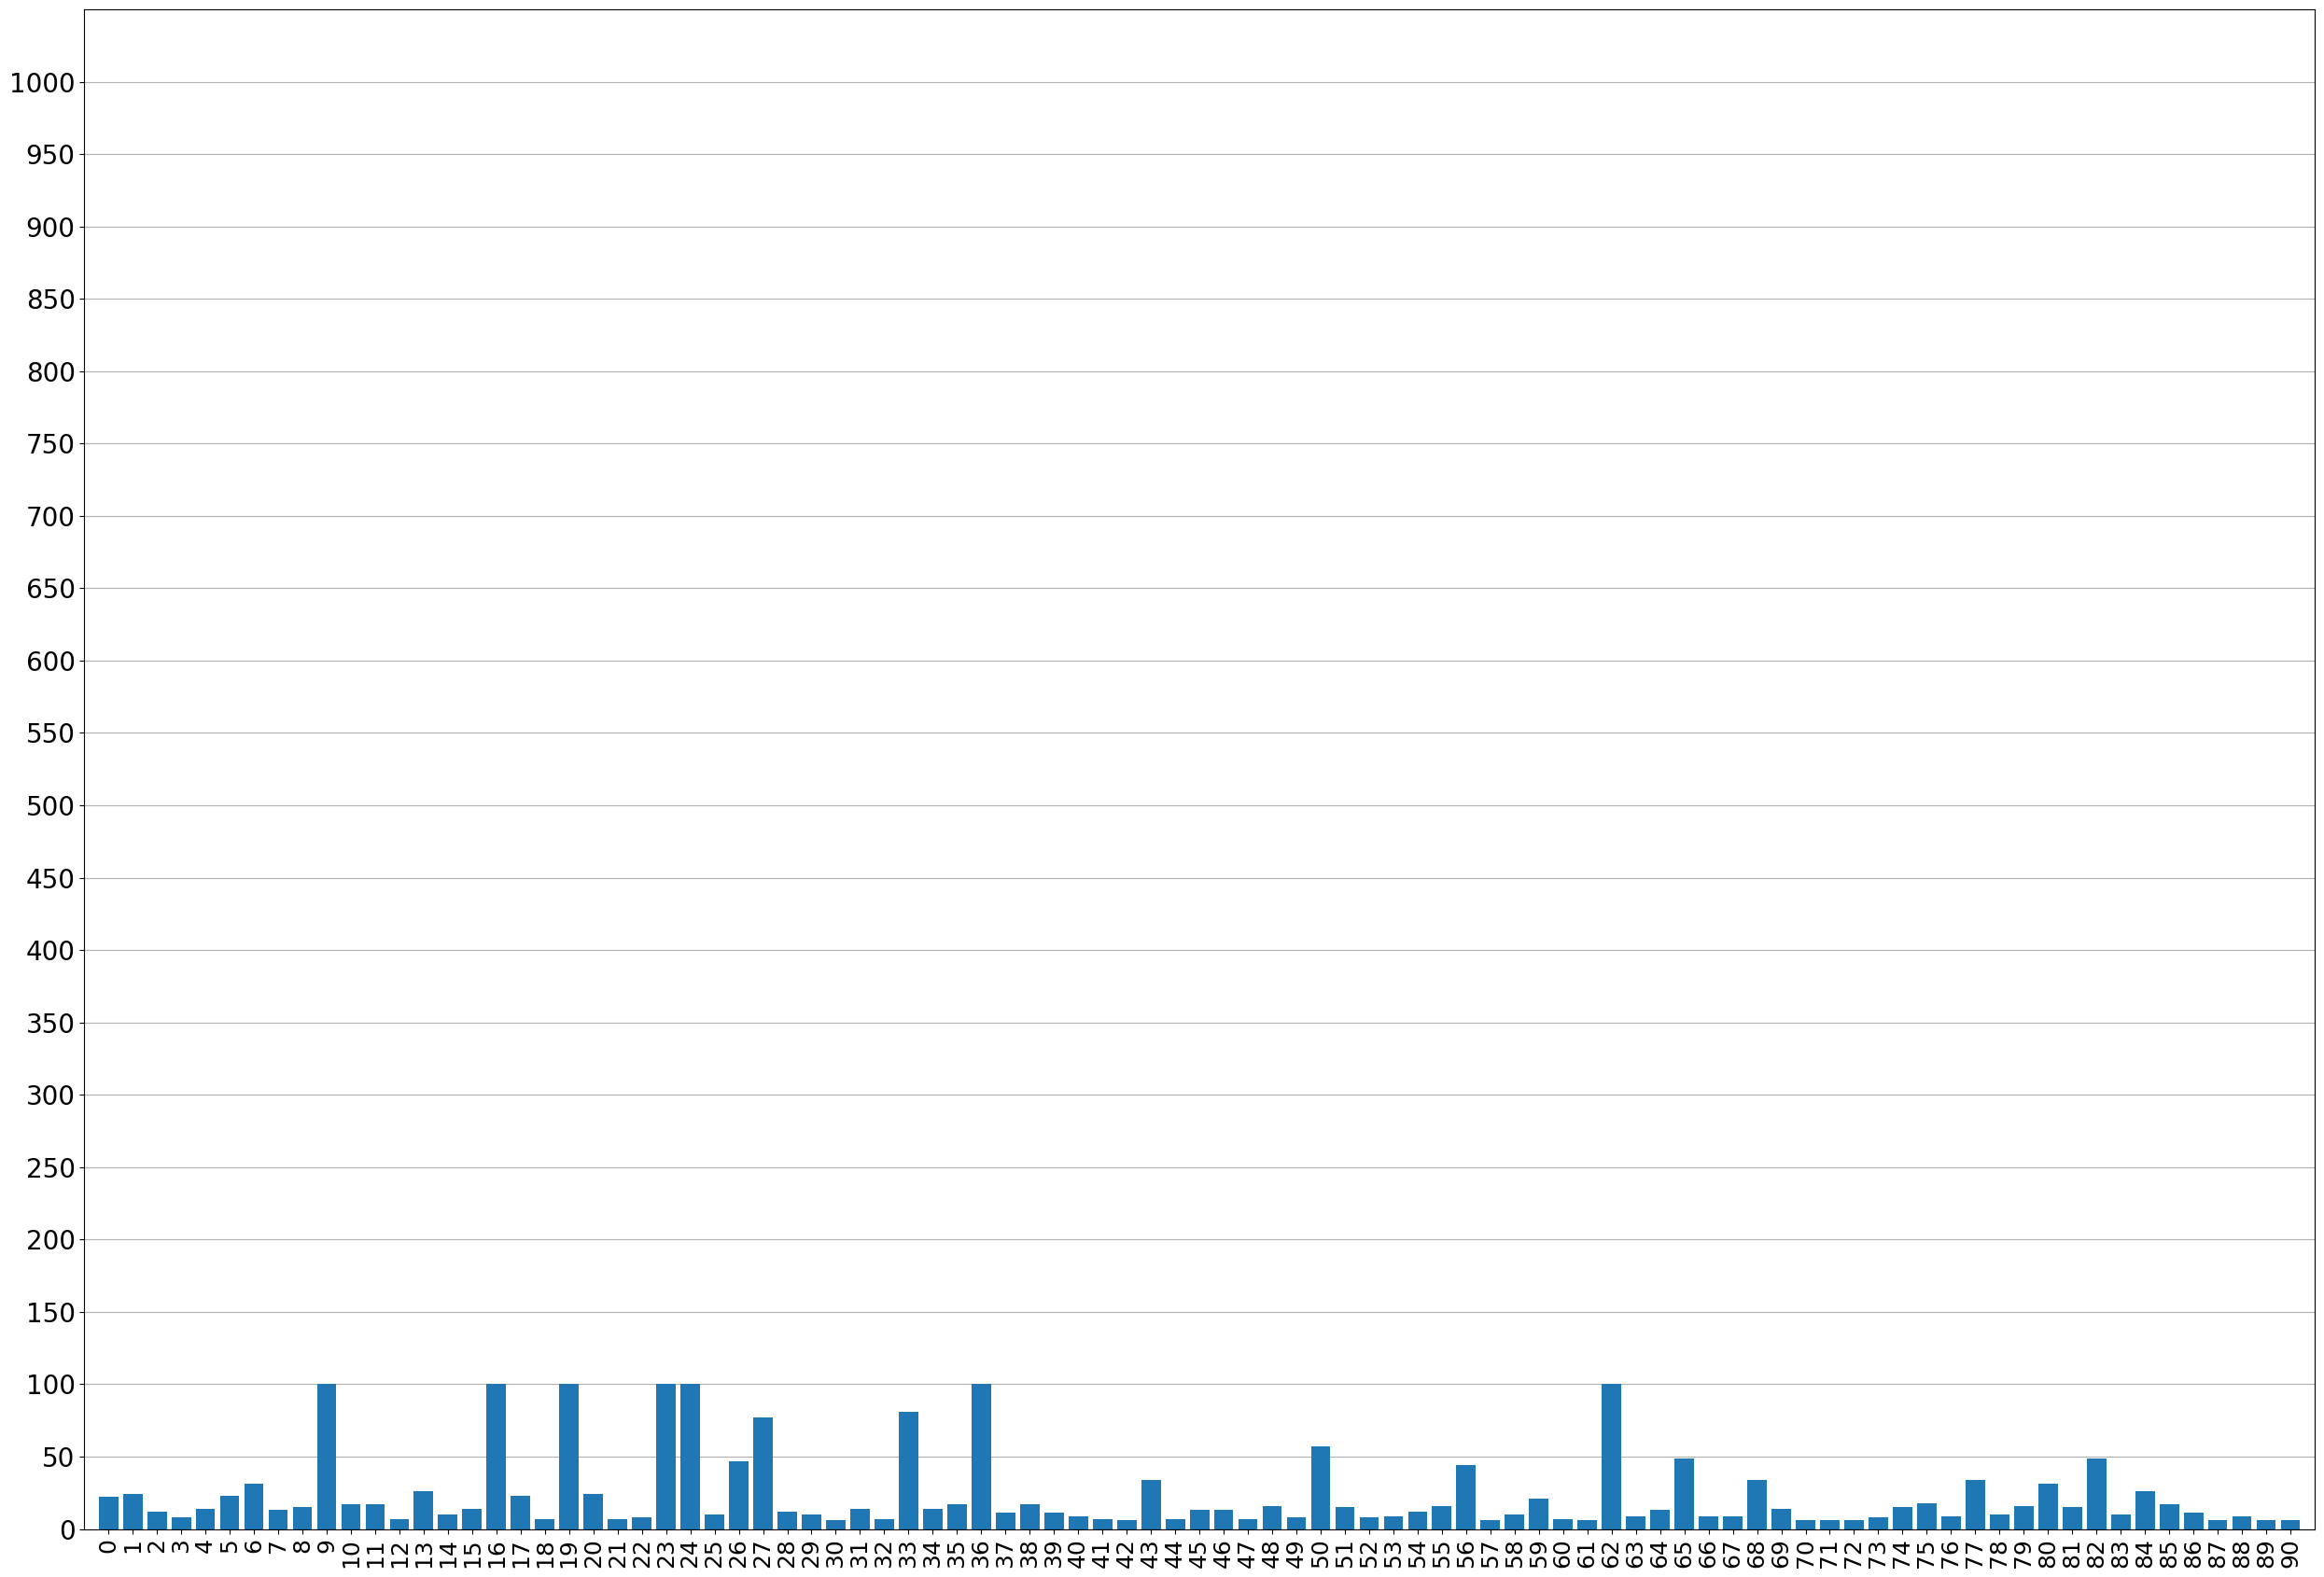

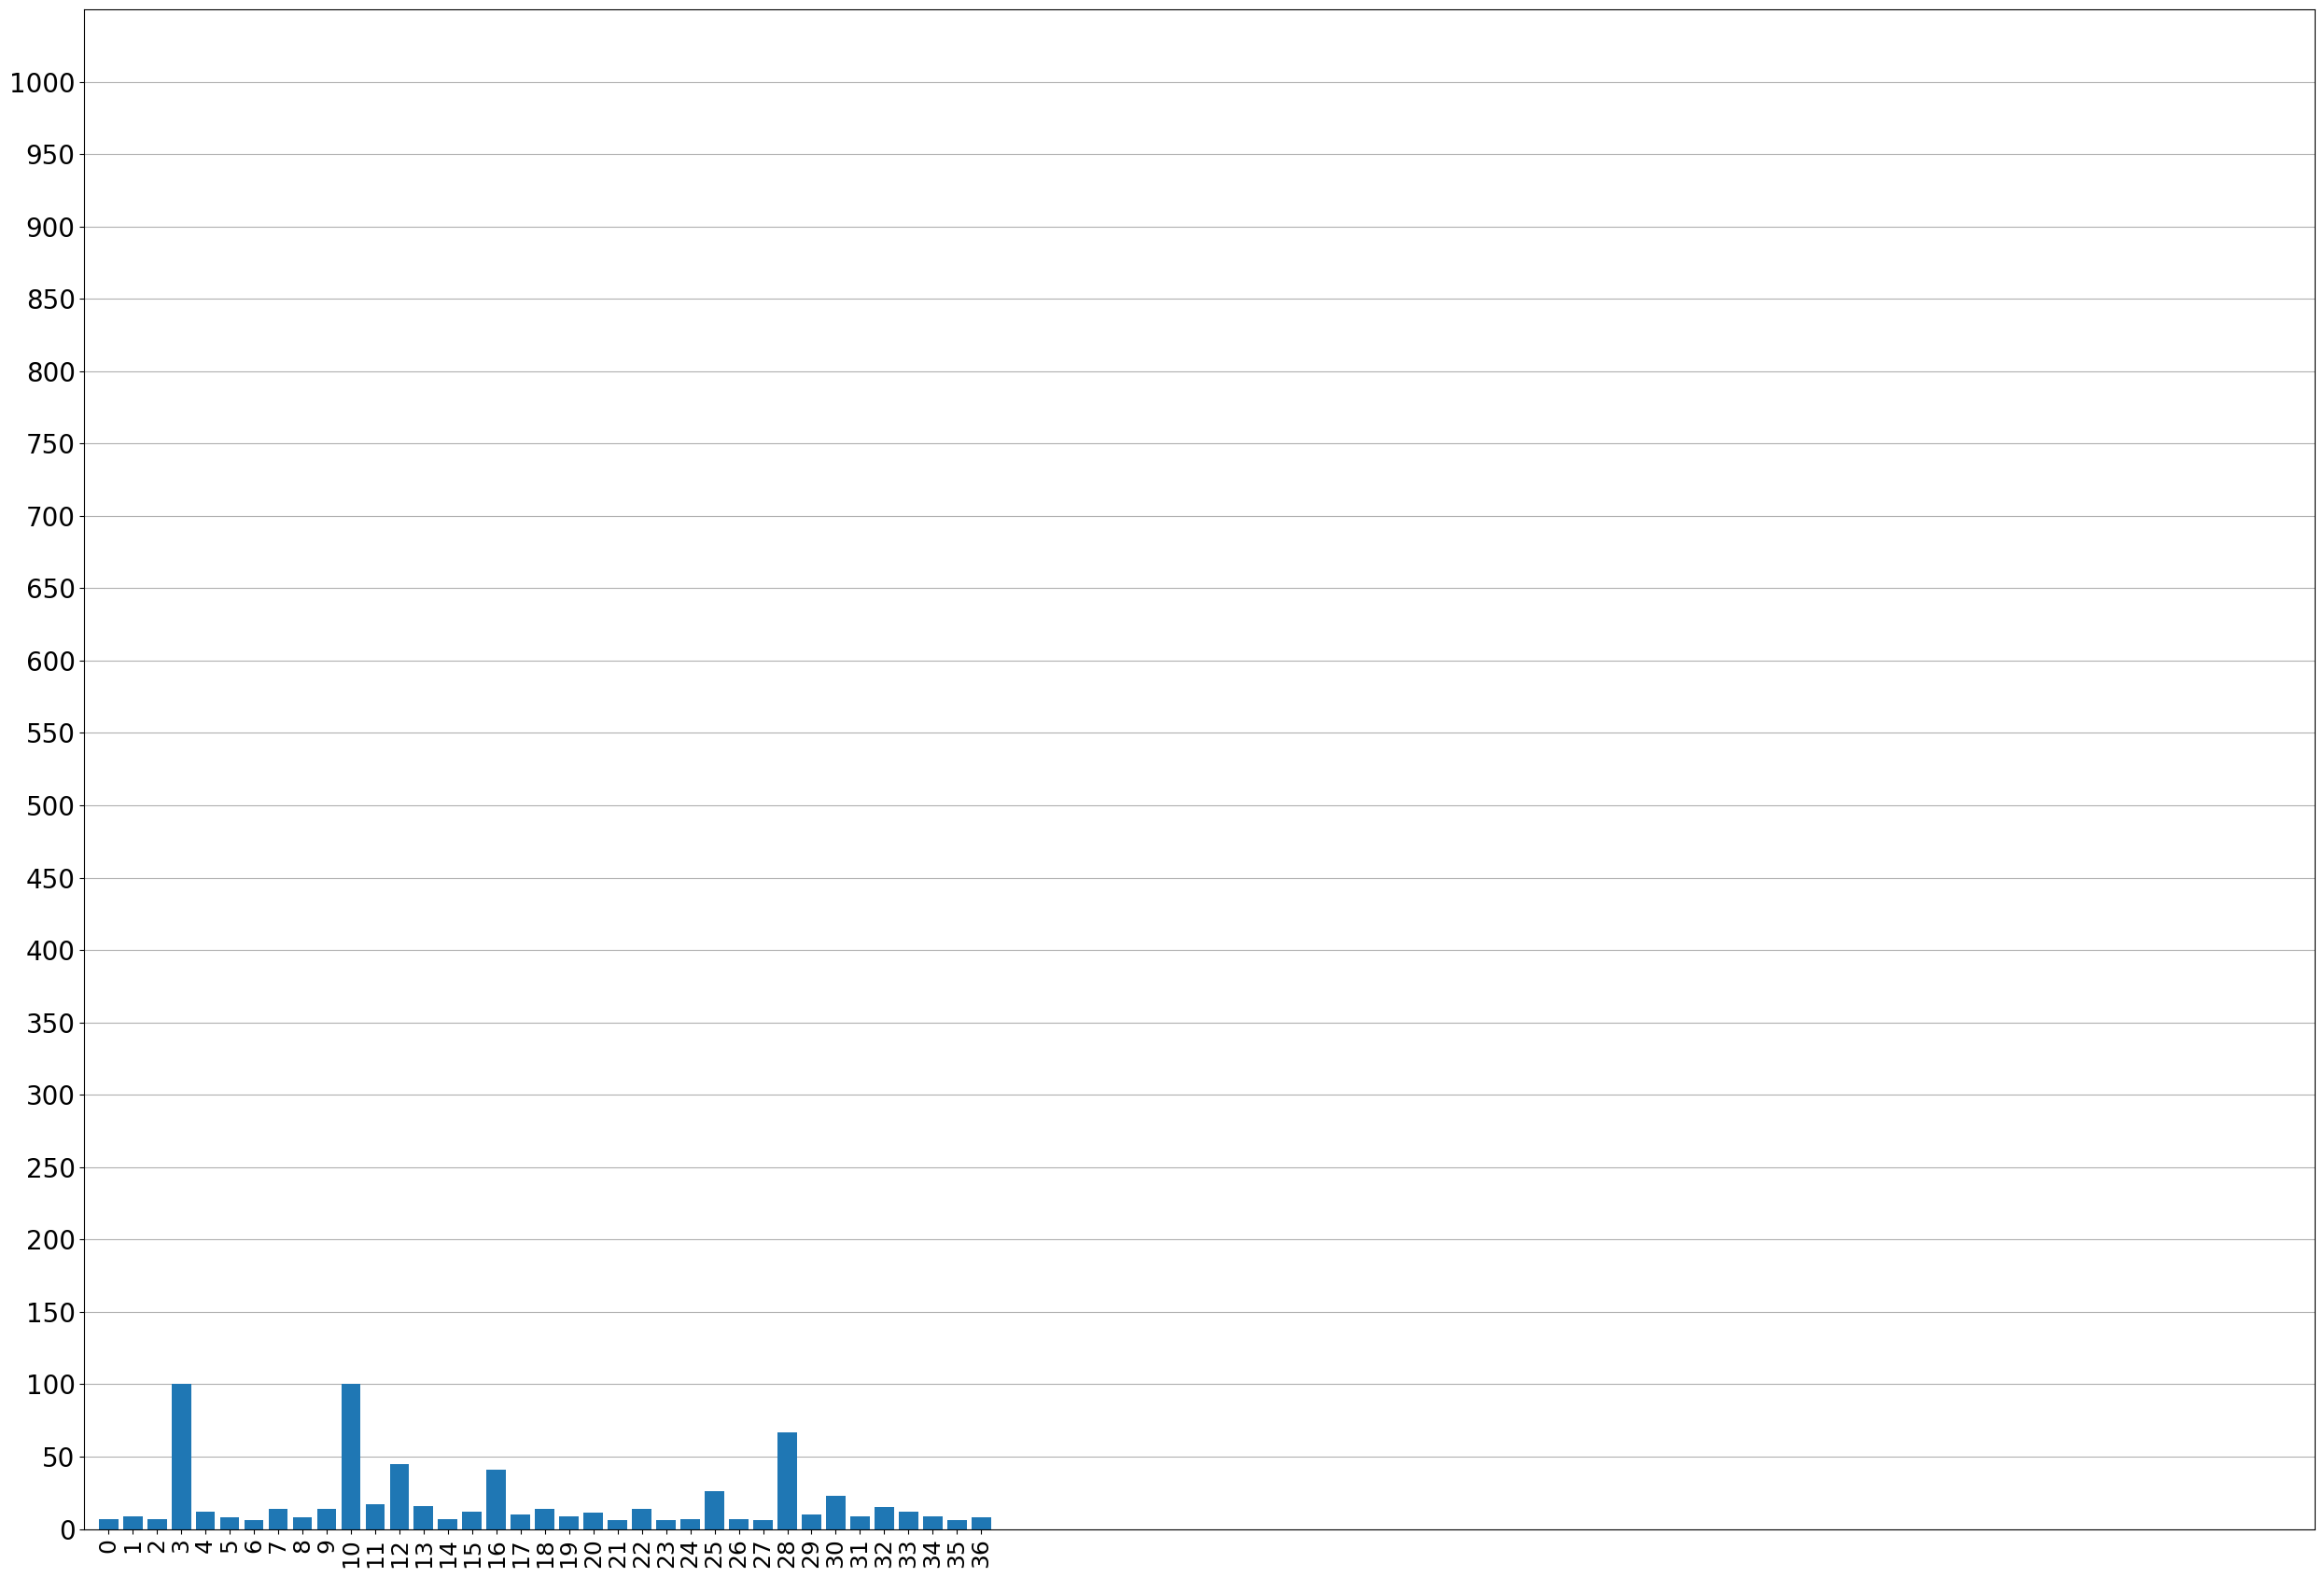

In [212]:
plot_bar_chart( test_low_id_species_count, destination_dir / 'low_id_test.pdf')
plot_bar_chart( test_low_ood_species_count, destination_dir / 'low_ood_test.pdf')